In [134]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Text(0, 0.5, 'occurance')

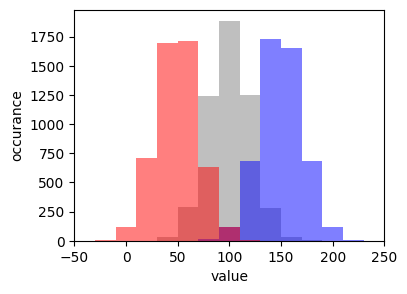

In [135]:
# Generate samples, loc is mean, scale is sigma, size is number of data points
base = 100
difference = 50
sigma = 20
N_data = 5000
no_treatment_control = np.random.normal(loc=base, scale=sigma, size=N_data)
equal_size_increase = np.random.normal(
    loc=base + difference, scale=sigma, size=N_data
)
equal_size_decrease = np.random.normal(
    loc=base - difference, scale=sigma, size=N_data
)

plt.figure(figsize=(4, 3))
upperlimit = base + difference + 5 * sigma
lowerlimit = base - difference - 5 * sigma
plt.hist(
    no_treatment_control,
    range=(lowerlimit, upperlimit),
    bins=15,
    color="gray",
    alpha=0.5,
)
plt.hist(
    equal_size_increase,
    range=(lowerlimit, upperlimit),
    bins=15,
    color="blue",
    alpha=0.5,
)
plt.hist(
    equal_size_decrease, range=(lowerlimit, upperlimit), bins=15, color="red", alpha=0.5
)
plt.xlim(lowerlimit, upperlimit)
plt.xlabel("value")
plt.ylabel("occurance")

Text(0, 0.5, 'occurance')

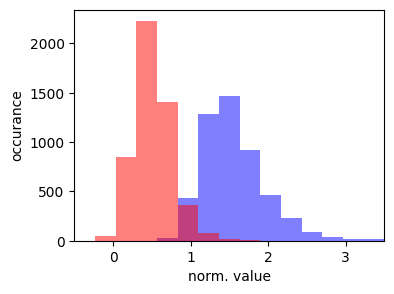

In [136]:
# normalized to get fold change
norm_equal_size_increase = equal_size_increase / no_treatment_control
norm_equal_size_decrease = equal_size_decrease / no_treatment_control
plt.figure(figsize=(4, 3))
upperlimit = (base + difference + 10 * sigma) / base
lowerlimit = (base - difference - 5 * sigma) / base
plt.hist(
    norm_equal_size_increase,
    range=(lowerlimit, upperlimit),
    bins=15,
    color="blue",
    alpha=0.5,
)
plt.hist(
    norm_equal_size_decrease,
    range=(lowerlimit, upperlimit),
    bins=15,
    color="red",
    alpha=0.5,
)
plt.xlim(lowerlimit, upperlimit)
plt.xlabel("norm. value")
plt.ylabel("occurance")

In [137]:
# Independent t-test on raw data
N = 5000  # imaginary runs
N_exp = 3  # real world experiment times

lst_raw_increase_pval = []
lst_raw_decrease_pval = []
lst_norm_increase_pval = []
lst_norm_decrease_pval = []

for i in range(N):
    no_treatment_control = np.random.normal(loc=base, scale=sigma, size=N_exp)
    equal_size_increase = np.random.normal(
        loc=base + difference, scale=sigma, size=N_exp
    )
    equal_size_decrease = np.random.normal(
        loc=base - difference, scale=sigma, size=N_exp
    )
    norm_equal_size_increase = equal_size_increase / no_treatment_control
    norm_equal_size_decrease = equal_size_decrease / no_treatment_control
    lst_raw_increase_pval.append(
        stats.ttest_ind(equal_size_increase, no_treatment_control).pvalue
    )
    lst_raw_decrease_pval.append(
        stats.ttest_ind(equal_size_decrease, no_treatment_control).pvalue
    )
    lst_norm_increase_pval.append(
        stats.ttest_1samp(norm_equal_size_increase, 1).pvalue
    )
    lst_norm_decrease_pval.append(
        stats.ttest_1samp(norm_equal_size_decrease, 1).pvalue
    )

Text(0, 0.5, 'probability density')

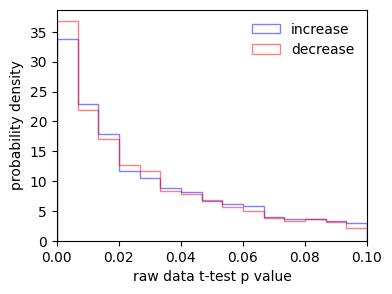

In [138]:
plt.figure(figsize=(4, 3))
plt.hist(
    lst_raw_increase_pval,
    range=(0, 0.1),
    bins=15,
    density=True,
    histtype='step',
    # cumulative=True,
    color="blue",
    alpha=0.5,
    label='increase',
)
plt.hist(
    lst_raw_decrease_pval,
    range=(0, 0.1),
    bins=15,
    density=True,
    histtype='step',
    # cumulative=True,
    color="red",
    alpha=0.5,
    label='decrease',
)
plt.legend(frameon=False)
plt.xlim(0, 0.1)
plt.xlabel("raw data t-test p value")
plt.ylabel("probability density")

Text(0, 0.5, 'probability density')

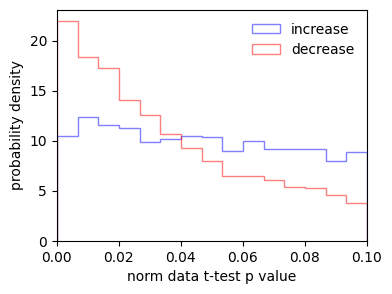

In [139]:
plt.figure(figsize=(4, 3))
plt.hist(
    lst_norm_increase_pval,
    range=(0, 0.1),
    bins=15,
    density=True,
    histtype='step',
    # cumulative=True,
    color="blue",
    alpha=0.5,
    label='increase',
)
plt.hist(
    lst_norm_decrease_pval,
    range=(0, 0.1),
    bins=15,
    density=True,
    histtype='step',
    # cumulative=True,
    color="red",
    alpha=0.5,
    label='decrease',
)
plt.legend(frameon=False)
plt.xlim(0, 0.1)
plt.xlabel("norm data t-test p value")
plt.ylabel("probability density")